In [1]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
from HW5.variable_step_bdf_mol import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1

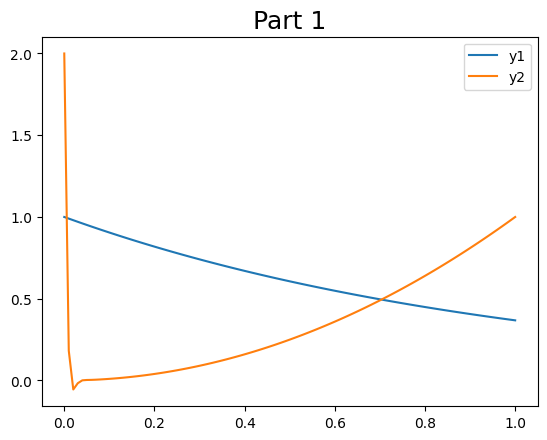

In [2]:
def f1(y1,y2,t):
    return -1*y1

def f2(y1,y2,t):
    return -1000*(y2 - t**2) + 2*t

def df1dy1(y1,y2,t):
    return -1

def df1dy2(y1,y2,t):
    return 0

def df2dy1(y1,y2,t):
    return 0

def df2dy2(y1,y2,t):
    return -1000

# Find y(t=.01) using theta method, needed to start second order BDF
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.01,
    t_end=.01,
    y0=[1,2],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

# Use second order BDF to solve
y_bdf = fixed_h_bdf(
    f=[f1,f2],
    h=.01,
    t_end=1,
    y0=y0,
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

plt.plot(np.arange(0,1.0001,.01), y_bdf[0,:], label='y1')
plt.plot(np.arange(0,1.0001,.01), y_bdf[1,:], label = 'y2')
plt.legend()
plt.title('Part 1', fontsize=18)
plt.show()

# Part 2

## Question 1

In [3]:
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.0001,
    t_end=.0002,
    y0=[10,10],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

In [4]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f1(y1,y2,t):
    return .25*y1 - .01*y1*y2

def f2(y1,y2,t):
    return -y2 + .01*y1*y2

def df1dy1(y1,y2,t):
    return .25 - .01*y2

def df1dy2(y1,y2,t):
    return -.01*y1

def df2dy1(y1,y2,t):
    return .01*y2

def df2dy2(y1,y2,t):
    return -1 + .01*y1

# Find y(t=.01) using theta method, needed to start second order BDF
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.01,
    t_end=.02,
    y0=[10,10],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

h_list = [.01] * 2

soln1 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=100,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-3)

soln2 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=100,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-5)

y_bdf1 = np.array(soln1['y'])
y_bdf2 = np.array(soln2['y'])

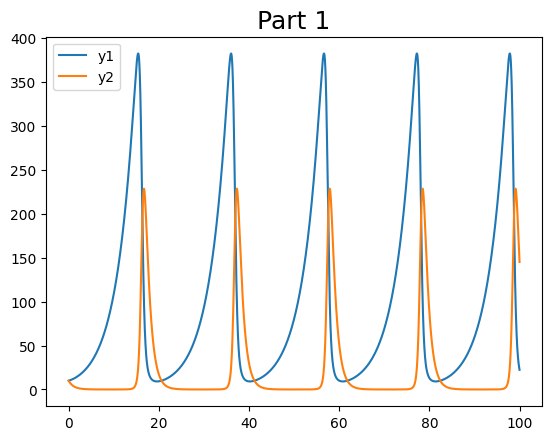

In [5]:
plt.plot(soln1['t'], y_bdf1[0,:], label = 'y1')
plt.plot(soln1['t'], y_bdf1[1,:], label = 'y2')
plt.legend()
plt.title('Part 1', fontsize=18)
plt.show()

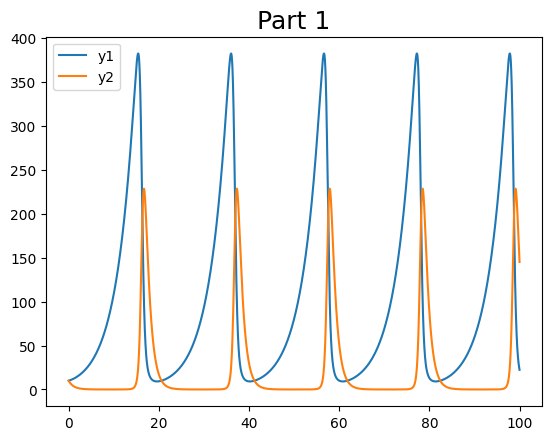

In [6]:
plt.plot(soln2['t'], y_bdf2[0,:], label = 'y1')
plt.plot(soln2['t'], y_bdf2[1,:], label = 'y2')
plt.legend()
plt.title('Part 1', fontsize=18)
plt.show()

## Question 2

In [7]:
from HW4.ThetaMethod import *
from HW5.fixed_step_bdf import *
from HW5.variable_step_bdf import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def f1(y1,y2,t):
    return y2

def f2(y1,y2,t):
    return 2*((1-y1**2)*y2 - y1)

def df1dy1(y1,y2,t):
    return 0

def df1dy2(y1,y2,t):
    return 1

def df2dy1(y1,y2,t):
    return 2*(-2*y1*y2 - 1)

def df2dy2(y1,y2,t):
    return 2*(1-y1**2)

# Find y(t=.01) using theta method, needed to start second order BDF
y0 = theta_method(
    f=[f1,f2],
    theta=0,
    h=.01,
    t_end=.02,
    y0=[2,0],
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]]
)

h_list = [.01] * 2

soln1 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=11,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-3)

soln2 = variable_h_bdf(
    f=[f1,f2],
    h=.01,
    t_start=[0,.01,.02,.03],
    t_end=100,
    y0=y0.tolist(),
    dfdy=[[df1dy1,df1dy2],[df2dy1,df2dy2]],
    h_matrix=h_list,
    tol=1e-5)

y_bdf1 = np.array(soln1['y'])
y_bdf2 = np.array(soln2['y'])

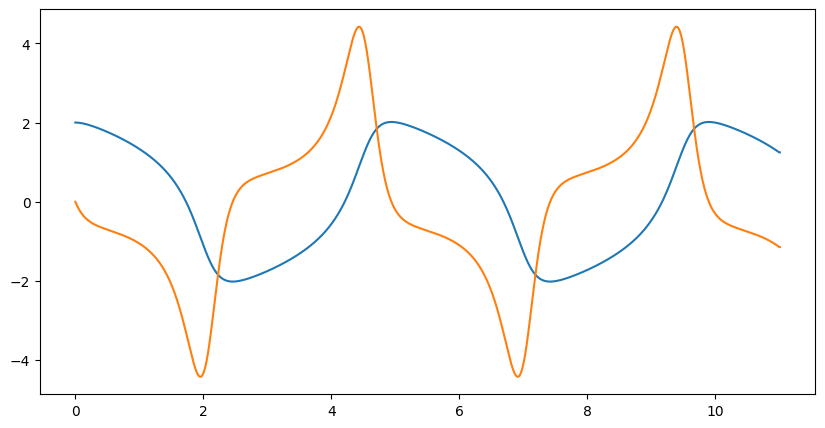

In [8]:
plt.figure(figsize=(10,5))
plt.plot(soln1['t'], y_bdf1[0,:])
plt.plot(soln1['t'], y_bdf1[1,:])
plt.show()

## Question 3

In [260]:
dx = .25
L = 1

x_vals = np.arange(0, L+dx, dx)
boundary_conditions = [0,0]
initial_conditions = [2*x if x <=.5 else 2-2*x for x in x_vals]

y = np.zeros((len(x_vals),1))
y[0,:] = boundary_conditions[0]
y[-1,:] = boundary_conditions[1]
y[:,0] = initial_conditions

A = np.diag([-2]*(len(x_vals)-2)) + np.diag([1]*(len(x_vals)-3),1) + np.diag([1]*(len(x_vals)-3),-1)
A = A/dx**2

t = [0]
i = 1
h = .001
go = True
tol = 1e-3

for j in range(1,3):
    y_copy = y.copy()
    zero_col = np.zeros((len(x_vals), 1))
    y = np.hstack((y_copy, zero_col))
    b = (y_copy[1:-1,j-1])
    system_matrix = np.eye(len(x_vals) - 2) - h * A
    soln = np.linalg.solve(system_matrix,b)
    y[1:-1,j] = soln
    t.append(
        t[-1] + h
    )
    i+=1




print(y)

# while go is True:
while go is True:
    next_iter = y[:,i-1]
    current_iter = next_iter + tol * 1000

    zero_col = np.zeros((len(x_vals), 1))
    y = np.hstack((y, zero_col))
    
    while abs(np.max(current_iter - next_iter)) > tol:
        current_iter = next_iter.copy()
        b = 4 * y[1:-1, i-1] - y[1:-1, i-2]
        system_matrix = 3 * np.eye(len(x_vals) - 2) - 2 * h * A
        soln = np.linalg.solve(system_matrix,b)
        next_iter = np.hstack((0,soln,0))

    y[1:-1,i] = next_iter[1:-1]
    t.append(
        t[-1] + h
    )
    i+=1

    if t[-1] - 1 > .0001:
        go = False

[[0.         0.         0.        ]
 [0.5        0.49975951 0.49929323]
 [1.         0.98448867 0.96944385]
 [0.5        0.49975951 0.49929323]
 [0.         0.         0.        ]]


In [261]:
pd.DataFrame(y)

,0,1,2,3,4,5,6,7,8,9,...,992,993,994,995,996,997,998,999,1000,1001
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,0.499760,0.499293,0.498683,0.497888,0.496904,0.495737,0.494398,0.492897,0.491244,...,0.000055,0.000055,0.000054,0.000054,0.000053,0.000053,0.000052,0.000052,0.000051,0.000051
2,1.0,0.984489,0.969444,0.954701,0.940347,0.926400,0.912852,0.899690,0.886898,0.874458,...,0.000078,0.000077,0.000077,0.000076,0.000075,0.000075,0.000074,0.000073,0.000073,0.000072
3,0.5,0.499760,0.499293,0.498683,0.497888,0.496904,0.495737,0.494398,0.492897,0.491244,...,0.000055,0.000055,0.000054,0.000054,0.000053,0.000053,0.000052,0.000052,0.000051,0.000051
4,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [234]:
df = pd.DataFrame(y)
df.loc[21] = pd.Series(t).round(4)
df.loc[21][df.loc[21] == .25].index

Index([250], dtype='int64')

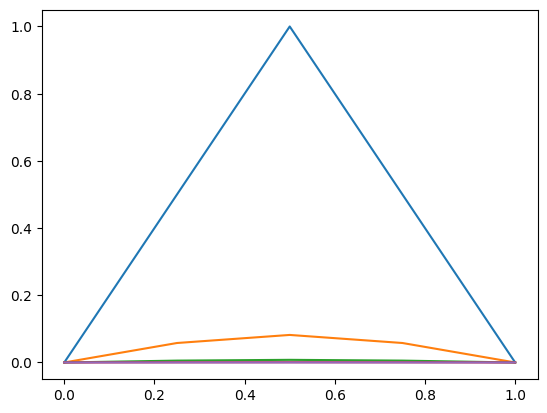

In [235]:
df = pd.DataFrame(y)
df.loc[21] = pd.Series(t).round(4)
df.loc[21][df.loc[21] == .25].index
plt.plot(x_vals,df[0][:-1])
plt.plot(x_vals,df[250][:-1])
plt.plot(x_vals,df[500][0:-1])
plt.plot(x_vals,df[750][0:-1])
plt.plot(x_vals,df[1000][0:-1])
plt.show()

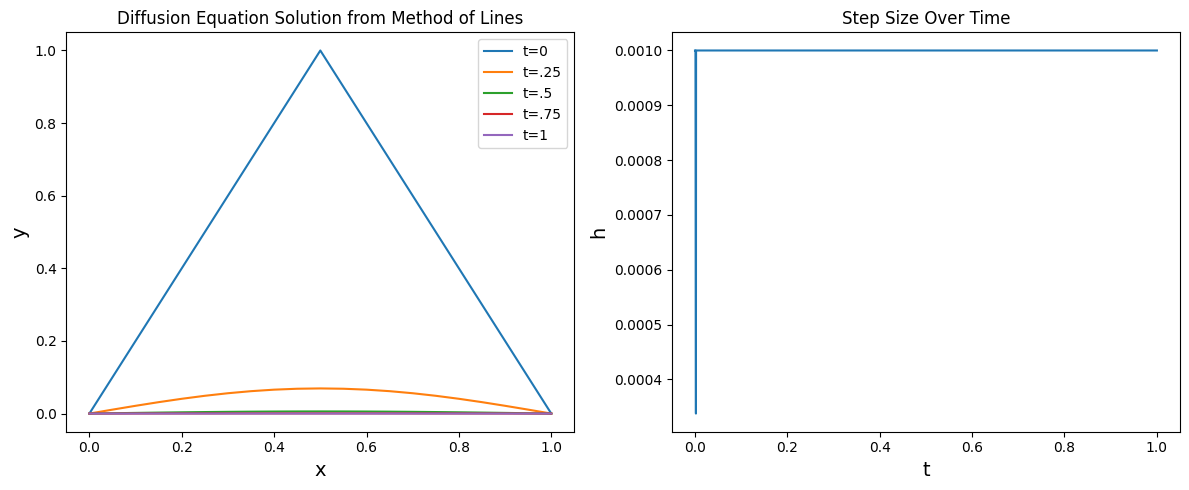

In [16]:
sol = variable_h_bdf_mol(dx=.05,tol=1e-6)
y = sol['y']
t = sol['t']
pd.DataFrame(sol['y'])

df = pd.DataFrame(y)
df.loc[21] = pd.Series(t).round(4)
df.loc[21][df.loc[21] == .25].index
L = 1
dx=.05
x_vals = np.arange(0, L+dx, dx)

fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(x_vals,df[0][:-1], label='t=0')
ax[0].plot(x_vals,df[250][:-1], label='t=.25')
ax[0].plot(x_vals,df[500][0:-1], label='t=.5')
ax[0].plot(x_vals,df[750][0:-1], label='t=.75')
ax[0].plot(x_vals,df[1000][0:-1], label='t=1')
ax[0].set_title('Diffusion Equation Solution from Method of Lines')
ax[0].set_xlabel('x', fontsize=14)
ax[0].set_ylabel('y', fontsize=14)
ax[0].legend()

ax[1].plot(sol['t'],sol['h_list'])
ax[1].set_title('Step Size Over Time')
ax[1].set_xlabel('t', fontsize=14)
ax[1].set_ylabel('h', fontsize=14)

fig.tight_layout()

plt.show()